In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.quack import Quack

In [2]:
rushes = Quack.query("""
with raw as (
select pbp.desc,pbp.game_id, pbp.yards_gained,ids.gsis_id,
					 pbp.season,
					 pbp.week,
					 pbp.ydstogo,
					 pbp.down,
					 pbp.touchdown,
	case when pbp.down = 1 then 1 else 0 end as is_first_down,
	case when pbp.down = 2 then 1 else 0 end as is_second_down,
	case when pbp.down = 3 then 1 else 0 end as is_third_down,
	case when pbp.down = 4 then 1 else 0 end as is_fourth_down,
	case when yards_gained <= 0 then 1 else 0 end as stuffed,
	case when yards_gained >= ydstogo and ydstogo <= 2 then 1 
		 when yards_gained <= ydstogo and ydstogo <= 2 then 0 end as short_first,
	case when yards_gained < ydstogo and (yards_gained <= 3 and yards_gained >= 1) then 1 else 0 end as mediocre,
	case when yards_gained between 3 and 9 then 1 else 0 end as decent_run,
	case when yards_gained >= 10 then 1 else 0 end as explosive,
	case when yards_gained >= 20 then 1 else 0 end as huge_play,
					 epa,
	pbp.first_down, pbp.touchdown
    ,rusher_player_name
    ,rusher_id,
	season,
	week,
	qb_scramble,
					 ids.name
	from pbp 
	join ids on pbp.rusher_id = ids.gsis_id
	where pbp.play_type = 'run'
	and pbp.yards_gained is not null
	and pbp.down is not null
	and pbp.penalty = 0
	and pbp.fumble = 0
	and season > 2000
	)
	select  
* from raw
order by season, week
""")

rushes

,desc,game_id,yards_gained,gsis_id,season,week,ydstogo,down,touchdown,is_first_down,...,huge_play,epa,first_down,touchdown_1,rusher_player_name,rusher_id,season_1,week_1,qb_scramble,name
0,(4:32) 49-T.Richardson to LV 29 for -1 yards (...,2001_01_OAK_KC,-1.0,00-0013694,2001,1,10.0,2.0,0.0,0,...,0,-0.916144,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
1,(14:52) 49-T.Richardson right end to KC 22 for...,2001_01_OAK_KC,2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.527541,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
2,(13:06) 49-T.Richardson up the middle to KC 31...,2001_01_OAK_KC,-2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.891649,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
3,(6:49) 49-T.Richardson up the middle to LV 13 ...,2001_01_OAK_KC,-1.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.675594,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
4,(:37) 49-T.Richardson up the middle to KC 32 f...,2001_01_OAK_KC,2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.391140,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261828,(9:30) (No Huddle) 22-J.Croskey-Merritt left g...,2025_14_WAS_MIN,1.0,00-0040242,2025,14,10.0,1.0,0.0,1,...,0,-0.444760,0.0,0.0,J.Croskey-Merritt,00-0040242,2025,14,0.0,Jacory Croskey-Merritt
261829,(7:53) 27-J.Mason left guard to MIN 19 for 2 y...,2025_14_WAS_MIN,2.0,00-0037525,2025,14,10.0,1.0,0.0,1,...,0,-0.429865,0.0,0.0,J.Mason,00-0037525,2025,14,0.0,Jordan Mason
261830,(5:15) 36-Z.Scott right tackle to MIN 44 for 1...,2025_14_WAS_MIN,1.0,00-0038440,2025,14,10.0,1.0,0.0,1,...,0,-0.639509,0.0,0.0,Z.Scott,00-0038440,2025,14,0.0,Zavier Scott
261831,(3:42) 36-Z.Scott left end to WAS 40 for 4 yar...,2025_14_WAS_MIN,4.0,00-0038440,2025,14,10.0,2.0,0.0,0,...,0,-0.188082,0.0,0.0,Z.Scott,00-0038440,2025,14,0.0,Zavier Scott


In [3]:
cnt = rushes[['name', 'gsis_id']].value_counts().reset_index()
#cnt = cnt.loc[cnt['count'] > 80]
cnt.head(15)

,name,gsis_id,count
0,Frank Gore,00-0023500,3787
1,Adrian Peterson,00-0025394,3267
2,LaDainian Tomlinson,00-0020536,3233
3,Steven Jackson,00-0022736,2747
4,Derrick Henry,00-0032764,2700
5,Thomas Jones,00-0019641,2636
6,Marshawn Lynch,00-0025399,2599
7,LeSean McCoy,00-0027029,2462
8,Matt Forte,00-0026184,2352
9,Clinton Portis,00-0021179,2238


In [4]:
cnt.loc[cnt.name=='James Conner']

,name,gsis_id,count
45,James Conner,00-0033553,1372


In [5]:
lg_avg = rushes[['stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained']].mean()
lg_avg = lg_avg.to_frame().T
padding = cnt.merge(lg_avg, how='cross')
padding = pd.concat([padding] * 20, ignore_index=True)
padding['season'] = 2000
padding['week'] = 1

In [6]:
lg_avg

,stuffed,mediocre,explosive,huge_play,first_down,short_first,epa,yards_gained
0,0.18804,0.314727,0.107824,0.024611,0.23405,0.683146,-0.024462,4.286763


In [7]:
data = pd.concat((rushes[['name','gsis_id','stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained', 'season','week', 'game_id']], padding)).sort_values(by=['season','week','name'])

In [8]:
mean = data.groupby(['name', 'gsis_id'])[['stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained']].transform(lambda x: x.ewm(span=150, min_periods=10).mean())
#mean = mean.merge(cnt)
mean[['season','week','name','game_id','gsis_id']] = data[['season','week','name','game_id','gsis_id']]
mean = mean.groupby(['name','gsis_id','season','week', 'game_id']).tail(1)
mean = mean.drop('yards_gained', axis=1)

In [9]:
mean

,stuffed,mediocre,explosive,huge_play,first_down,short_first,epa,season,week,name,game_id,gsis_id
109,0.164445,0.390737,0.148302,0.073185,0.213170,0.700548,0.198733,2001,1,Ahman Green,2001_01_DET_GB,00-0006305
110,0.272084,0.282151,0.096664,0.022064,0.209824,0.645626,-0.178005,2001,1,Brett Favre,2001_01_DET_GB,00-0005106
100,0.168576,0.282151,0.096664,0.022064,0.261233,0.700330,0.008567,2001,1,Charlie Batch,2001_01_DET_GB,00-0000865
43,0.180986,0.275569,0.123548,0.018152,0.304122,0.716740,0.072182,2001,1,Donovan McNabb,2001_01_STL_PHI,00-0011022
30,0.204704,0.306516,0.118091,0.062432,0.213823,0.700330,-0.151293,2001,1,Fred Taylor,2001_01_PIT_JAX,00-0016098
...,...,...,...,...,...,...,...,...,...,...,...,...
261734,0.182783,0.213240,0.225881,0.065725,0.384659,0.719904,0.204896,2025,14,Velus Jones,2025_14_SEA_ATL,00-0037745
261380,0.241145,0.322717,0.067159,0.009258,0.178258,0.530339,-0.151925,2025,14,Woody Marks,2025_14_HOU_KC,00-0040583
261730,0.247400,0.235557,0.080581,0.024965,0.239039,0.477929,-0.035464,2025,14,Zach Charbonnet,2025_14_SEA_ATL,00-0039165
261832,0.170857,0.243895,0.121542,0.009425,0.220811,0.738334,-0.073915,2025,14,Zavier Scott,2025_14_WAS_MIN,00-0038440


In [10]:
#Quack.query('create or replace table rusher_adv as select * from mean')
import duckdb

# Assuming 'mean' is your Pandas DataFrame
con = duckdb.connect("data/nfl.duckdb")

# Register the DataFrame
con.register("mean_df", mean)

# Now you can create a DuckDB table from it
con.execute("CREATE OR REPLACE TABLE rusher_adv AS SELECT * FROM mean_df")
con.close()

In [11]:
con.close()

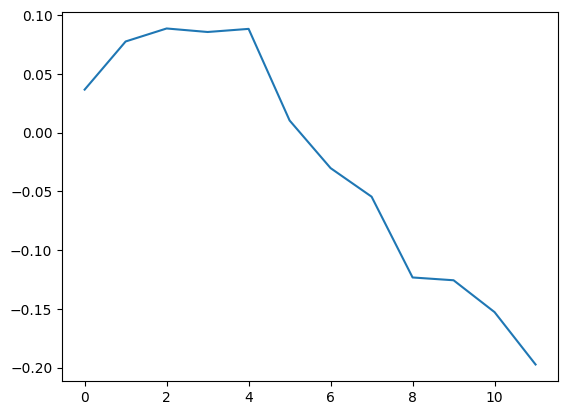

In [12]:
out = mean.loc[mean.name=="Quinshon Judkins"].copy().reset_index(drop=True)
out = out.groupby(['name','gsis_id','season','week']).tail(1)
plt.plot(out['epa'])

In [13]:
import pandas as pd
from utils.quack import Quack


team_rb_stats: pd.DataFrame = Quack.fetch_table("team_rushers")
team_rb_stats

,team,season,week,gsis_id_RB_2,gsis_id_RB_0,gsis_id_RB_1,player_display_name_RB_2,player_display_name_RB_0,player_display_name_RB_1,carries_roll_RB_2,...,rushing_first_downs_roll_WR_0,receptions_roll_WR_0,targets_roll_WR_0,receiving_yards_roll_WR_0,receiving_tds_roll_WR_0,fantasy_points_roll_WR_0,fantasy_points_ppr_roll_WR_0,offense_snaps_roll_WR_0,offense_pct_roll_WR_0,yards_per_carry_roll_WR_0
0,ARI,2013,1,00-0030287,00-0026163,00-0030282,Andre Ellington,Rashard Mendenhall,Stepfan,NaN,...,2.500971e-16,4.309594,9.561624,49.749116,0.087666,5.500917,9.810512,0.000000,0.000000,3.000000
1,ARI,2013,2,00-0030282,00-0026163,00-0030287,Stepfan Taylor,Rashard Mendenhall,Andre Ellington,NaN,...,1.875729e-16,3.732196,8.421218,40.561837,0.065750,4.450688,8.182884,0.000000,0.000000,3.000000
2,ARI,2013,3,00-0027346,00-0026163,00-0030287,Alfonso Smith,Rashard Mendenhall,Andre Ellington,3.572528,...,1.406796e-16,4.799147,9.815914,50.421378,0.549312,8.338016,13.137163,71.000000,1.000000,3.000000
3,ARI,2013,4,00-0030287,00-0026163,00-0027346,Andre Ellington,Rashard Mendenhall,Alfonso Smith,2.285714,...,1.055097e-16,4.099360,8.611935,46.066033,0.411984,7.078512,11.177872,56.714286,0.800000,3.000000
4,ARI,2013,5,00-0030287,00-0026163,00-0027346,Andre Ellington,Rashard Mendenhall,Alfonso Smith,2.594595,...,0.000000e+00,4.095180,7.121197,56.847328,0.108587,6.124119,10.219298,61.810811,0.944324,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,WAS,2025,2,00-0033955,00-0033699,00-0040242,Jeremy McNichols,Austin Ekeler,Jacory Croskey-Merritt,2.065850,...,4.552649e-06,4.682685,7.705220,65.029110,0.959102,12.251513,16.934198,63.295930,0.858591,2.983463
5404,WAS,2025,3,00-0038611,00-0040242,00-0033955,Chris Rodriguez Jr.,Jacory Croskey-Merritt,Jeremy McNichols,3.696599,...,3.414487e-06,4.012014,6.778915,55.521833,0.719326,9.863635,13.875649,61.221948,0.841443,2.987573
5405,WAS,2025,8,00-0038611,00-0040242,00-0033955,Chris Rodriguez Jr.,Jacory Croskey-Merritt,Jeremy McNichols,4.344016,...,1.920649e-06,3.944258,6.500640,58.731031,0.404621,8.298295,12.242552,54.999846,0.793937,2.992992
5406,WAS,2025,13,00-0033955,00-0038611,00-0040242,Jeremy McNichols,Chris Rodriguez Jr.,Jacory Croskey-Merritt,2.420485,...,9.353059e-07,3.459829,5.217746,56.303889,0.710066,9.889550,13.349379,39.609143,0.627749,2.996582
